In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
from collections import Counter



from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
import requests

# onedrive_url = "https://uconn-my.sharepoint.com/:x:/g/personal/dominic_rendero_uconn_edu/ER73z7RwFaJLjEaAARfTj8wB2OTI4JBi1_iVV38_yZEtcg?e=cdpauO"
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ks-projects-201801.csv'
kickstarter_data = pd.read_csv(file_path)
print(kickstarter_data.head())


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
kickstarter_cleaned = kickstarter_data.drop(columns=['ID', 'name', 'pledged', 'usd pledged', 'category', 'currency', 'backers', 'country', 'usd_pledged_real', 'goal'])

print(kickstarter_cleaned.head(15))

kickstarter_cleaned['target'] = kickstarter_cleaned['state'].apply(lambda x: 1 if x == 'successful' else 0)
kickstarter_cleaned = kickstarter_cleaned.drop(columns=['state'])  # Drop original state column

kickstarter_cleaned['launched'] = pd.to_datetime(kickstarter_cleaned['launched'])
kickstarter_cleaned['deadline'] = pd.to_datetime(kickstarter_cleaned['deadline'])

kickstarter_cleaned['duration_days'] = (kickstarter_cleaned['deadline'] - kickstarter_cleaned['launched']).dt.days
kickstarter_cleaned = kickstarter_cleaned.drop(columns=['launched', 'deadline'])

kickstarter_cleaned.rename(columns={'usd_goal_real': 'goal'}, inplace=True)
kickstarter_cleaned.rename(columns={'main_category': 'category'}, inplace=True)

kickstarter_cleaned['goal_to_duration_ratio'] = kickstarter_cleaned['goal'] / kickstarter_cleaned['duration_days']

kickstarter_cleaned['goal_to_duration_ratio'] = kickstarter_cleaned['goal_to_duration_ratio'].replace([float('inf'), -float('inf')], 0)
kickstarter_cleaned['goal_to_duration_ratio'] = kickstarter_cleaned['goal_to_duration_ratio'].fillna(0)

kickstarter_cleaned = pd.get_dummies(kickstarter_cleaned, columns=['category'], drop_first=True, dtype=int)
kickstarter_ratio = kickstarter_cleaned.drop(columns=['goal', 'duration_days'])
print(kickstarter_cleaned.head())
print(kickstarter_ratio.head())



   main_category    deadline             launched       state  usd_goal_real
0     Publishing  2015-10-09  2015-08-11 12:12:28      failed        1533.95
1   Film & Video  2017-11-01  2017-09-02 04:43:57      failed       30000.00
2   Film & Video  2013-02-26  2013-01-12 00:20:50      failed       45000.00
3          Music  2012-04-16  2012-03-17 03:24:11      failed        5000.00
4   Film & Video  2015-08-29  2015-07-04 08:35:03    canceled       19500.00
5           Food  2016-04-01  2016-02-26 13:38:27  successful       50000.00
6           Food  2014-12-21  2014-12-01 18:30:44  successful        1000.00
7           Food  2016-03-17  2016-02-01 20:05:12      failed       25000.00
8         Design  2014-05-29  2014-04-24 18:14:43    canceled      125000.00
9   Film & Video  2014-08-10  2014-07-11 21:55:48    canceled       65000.00
10    Publishing  2013-10-09  2013-09-09 18:19:37      failed        2406.39
11         Music  2013-04-08  2013-03-09 06:42:58  successful       12500.00

In [ ]:
category_counts = kickstarter_data['main_category'].value_counts()
print("Counts by category:")
print(category_counts)

target_counts = kickstarter_cleaned['target'].value_counts()
print("\nCounts by target:")
print(target_counts)


Counts by category:
main_category
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: count, dtype: int64

Counts by target:
target
0    244705
1    133956
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = kickstarter_cleaned.drop(columns=['target'])
y = kickstarter_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split

x = kickstarter_cleaned.drop(columns=['target']) 
y = kickstarter_cleaned['target'] 

scaler = StandardScaler()
x = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.66
Confusion Matrix:
[[66373  7023]
 [31059  9144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78     73396
           1       0.57      0.23      0.32     40203

    accuracy                           0.66    113599
   macro avg       0.62      0.57      0.55    113599
weighted avg       0.64      0.66      0.62    113599



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.65
Confusion Matrix:
[[58498 14898]
 [25083 15120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     73396
           1       0.50      0.38      0.43     40203

    accuracy                           0.65    113599
   macro avg       0.60      0.59      0.59    113599
weighted avg       0.63      0.65      0.63    113599



In [ ]:
x_r = kickstarter_ratio.drop(columns=['target']) 
y_r = kickstarter_ratio['target'] 

scaler = StandardScaler()
x_r = scaler.fit_transform(x_r)


x_r_train, x_r_test, y_r_train, y_r_test = train_test_split(x_r, y_r, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(x_r_train, y_r_train)
y_r_pred = model.predict(x_r_test)
accuracy = accuracy_score(y_r_test, y_r_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_r_test, y_r_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_r_test, y_r_pred)
print("Classification Report:")
print(report)

Accuracy: 0.66
Confusion Matrix:
[[70408  2988]
 [35921  4282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78     73396
           1       0.59      0.11      0.18     40203

    accuracy                           0.66    113599
   macro avg       0.63      0.53      0.48    113599
weighted avg       0.64      0.66      0.57    113599



In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.62
Confusion Matrix:
[[43922 29474]
 [13956 26247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67     73396
           1       0.47      0.65      0.55     40203

    accuracy                           0.62    113599
   macro avg       0.61      0.63      0.61    113599
weighted avg       0.66      0.62      0.63    113599



In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_r_train, y_r_train)
y_r_pred = model.predict(x_r_test)
accuracy = accuracy_score(y_r_test, y_r_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_r_test, y_r_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_r_test, y_r_pred)
print("Classification Report:")
print(report)

Accuracy: 0.60
Confusion Matrix:
[[40961 32435]
 [13372 26831]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64     73396
           1       0.45      0.67      0.54     40203

    accuracy                           0.60    113599
   macro avg       0.60      0.61      0.59    113599
weighted avg       0.65      0.60      0.61    113599



In [ ]:
x = kickstarter_cleaned.drop(columns=['target', 'duration_days']) 
y = kickstarter_cleaned['target'] 

scaler = StandardScaler()
x = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.66
Confusion Matrix:
[[70469  2927]
 [35939  4264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78     73396
           1       0.59      0.11      0.18     40203

    accuracy                           0.66    113599
   macro avg       0.63      0.53      0.48    113599
weighted avg       0.64      0.66      0.57    113599



In [ ]:
from sklearn.model_selection import train_test_split

x_1 = kickstarter_cleaned.drop(columns=['target', 'goal', 'duration_days']) 
y_1 = kickstarter_cleaned['target'] 

scaler = StandardScaler()
x_1 = scaler.fit_transform(x_1)


x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3, random_state=42)

In [ ]:
# model = LogisticRegression()
model.fit(x_train_1, y_train_1)
y_pred_1 = model.predict(x_test_1)
accuracy = accuracy_score(y_test_1, y_pred_1)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test_1, y_pred_1)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test_1, y_pred_1)
print("Classification Report:")
print(report)

Accuracy: 0.66
Confusion Matrix:
[[70408  2988]
 [35921  4282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78     73396
           1       0.59      0.11      0.18     40203

    accuracy                           0.66    113599
   macro avg       0.63      0.53      0.48    113599
weighted avg       0.64      0.66      0.57    113599



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

classes = np.unique(y_test_1)
cm = confusion_matrix(y_test_1, y_pred_1)

per_class_metrics = {}

for cls_idx, cls in enumerate(classes):
    TP = cm[cls_idx, cls_idx] 
    FP = cm[:, cls_idx].sum() - TP  
    FN = cm[cls_idx, :].sum() - TP  
    TN = cm.sum() - (TP + FP + FN) 

    per_class_metrics[cls] = {
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN
    }

print("Per-Class Metrics:")
for cls, metrics in per_class_metrics.items():
    print(f"Class {cls}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Per-Class Metrics:
Class 0:
  TP: 70408
  FP: 35921
  FN: 2988
  TN: 4282
Class 1:
  TP: 4282
  FP: 2988
  FN: 35921
  TN: 70408


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)




In [ ]:
model = LogisticRegression()
model.fit(x_resampled, y_resampled)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.60
Confusion Matrix:
[[41516 31880]
 [13460 26743]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65     73396
           1       0.46      0.67      0.54     40203

    accuracy                           0.60    113599
   macro avg       0.61      0.62      0.59    113599
weighted avg       0.65      0.60      0.61    113599



In [ ]:
model = LogisticRegression()
model.fit(x_resampled, y_resampled)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.60
Confusion Matrix:
[[41516 31880]
 [13460 26743]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65     73396
           1       0.46      0.67      0.54     40203

    accuracy                           0.60    113599
   macro avg       0.61      0.62      0.59    113599
weighted avg       0.65      0.60      0.61    113599



In [ ]:
y_probs = model.predict_proba(x_test)[:, 1]  
threshold = 0.3  
y_pred = (y_probs >= threshold).astype(int)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.66
Confusion Matrix:
[[70469  2927]
 [35939  4264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78     73396
           1       0.59      0.11      0.18     40203

    accuracy                           0.66    113599
   macro avg       0.63      0.53      0.48    113599
weighted avg       0.64      0.66      0.57    113599



In [ ]:
#Base NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = Sequential([
    Dense(128, activation='relu', input_dim=x_train.shape[1]), 
    Dropout(0.3), 
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6529 - loss: 0.6299 - val_accuracy: 0.6558 - val_loss: 0.6203
Epoch 2/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6568 - loss: 0.6176 - val_accuracy: 0.6575 - val_loss: 0.6152
Epoch 3/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6601 - loss: 0.6126 - val_accuracy: 0.6575 - val_loss: 0.6144
Epoch 4/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6559 - loss: 0.6140 - val_accuracy: 0.6564 - val_loss: 0.6121
Epoch 5/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6597 - loss: 0.6126 - val_accuracy: 0.6576 - val_loss: 0.6116
Epoch 6/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6563 - loss: 0.6130 - val_accuracy: 0.6578 - val_loss: 0.6130
Epoch 7/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6581 - loss: 0.6119 - val_accuracy: 0.6550 - val_loss: 0.6117
Epoch 8/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6580 - loss: 0

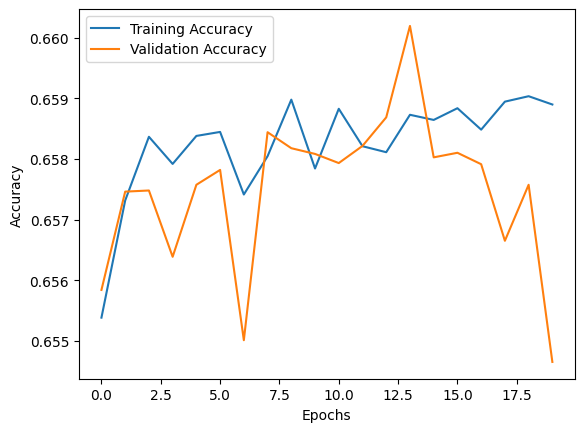

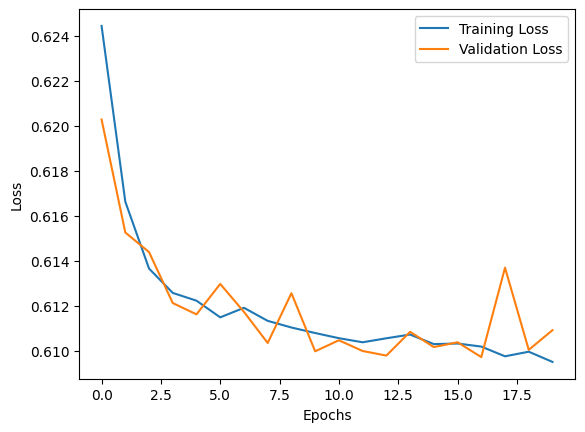

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#Base model with weights
class_weights = {0: 1.0, 1: len(y_train) / (2 * y_train.sum())}
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
6602/6627 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6445 - loss: 0.7863

ValueError: Cannot take the length of shape with unknown rank.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6627/6627 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6505 - loss: 0.6336 - val_accuracy: 0.6556 - val_loss: 0.6265
Epoch 2/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6560 - loss: 0.6216 - val_accuracy: 0.6553 - val_loss: 0.6184
Epoch 3/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6572 - loss: 0.6184 - val_accuracy: 0.6573 - val_loss: 0.6170
Epoch 4/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6562 - loss: 0.6178 - val_accuracy: 0.6568 - val_loss: 0.6173
Epoch 5/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6578 - loss: 0.6152 - val_accuracy: 0.6545 - val_loss: 0.6155
Epoch 6/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6584 - loss: 0.6140 - val_accuracy: 0.6546 - val_loss: 0.6157
Epoch 7/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6571 - loss: 0.6162 - val_accuracy: 0.6566 - val_loss: 0.6147
Epoch 8/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6571 - loss: 0.6154 - val

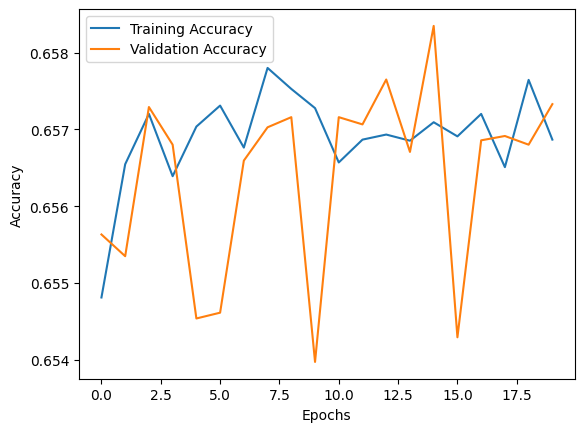

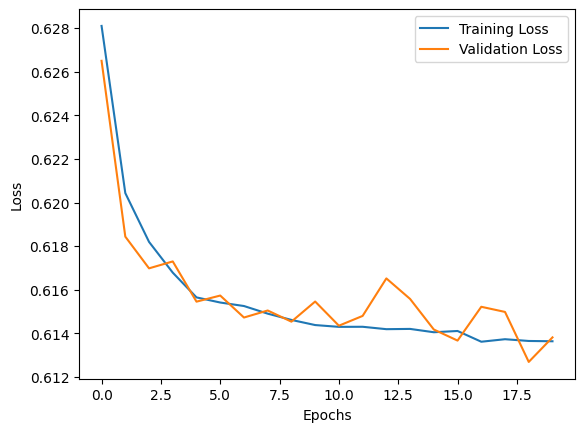

In [ ]:
#Base NN with ratio
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = Sequential([
    Dense(128, activation='relu', input_dim=x_r_train.shape[1]), 
    Dropout(0.3), 
    Dense(64, activation='relu'), 
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_r_train, y_r_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_r_pred_prob = model.predict(x_r_test)
y_r_pred = (y_r_pred_prob > 0.5).astype(int) 

accuracy = accuracy_score(y_r_test, y_r_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_r_test, y_r_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_r_test, y_r_pred)
print("Classification Report:")
print(report)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6627/6627 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6158 - loss: 0.6894 - val_accuracy: 0.6442 - val_loss: 0.6521
Epoch 2/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6452 - loss: 0.6513 - val_accuracy: 0.6443 - val_loss: 0.6516
Epoch 3/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6456 - loss: 0.6508 - val_accuracy: 0.6443 - val_loss: 0.6511
Epoch 4/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6450 - loss: 0.6509 - val_accuracy: 0.6443 - val_loss: 0.6512
Epoch 5/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6456 - loss: 0.6503 - val_accuracy: 0.6443 - val_loss: 0.6510
Epoch 6/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6464 - loss: 0.6498 - val_accuracy: 0.6443 - val_loss: 0.6510
Epoch 7/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6459 - loss: 0.6500 - val_accuracy: 0.6443 - val_loss: 0.6510
Epoch 8/20
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6444 - loss: 0.6510 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     73396
           1       0.00      0.00      0.00     40203

    accuracy                           0.65    113599
   macro avg       0.32      0.50      0.39    113599
weighted avg       0.42      0.65      0.51    113599



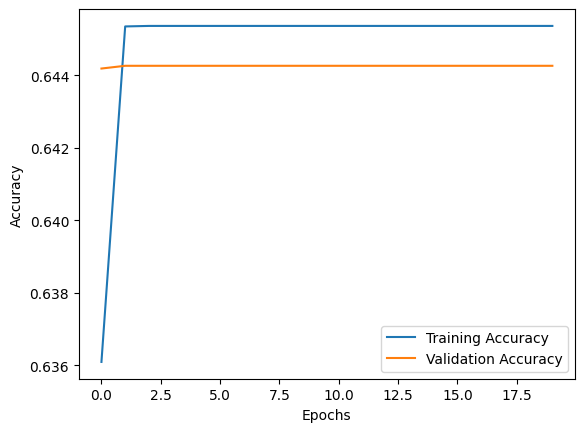

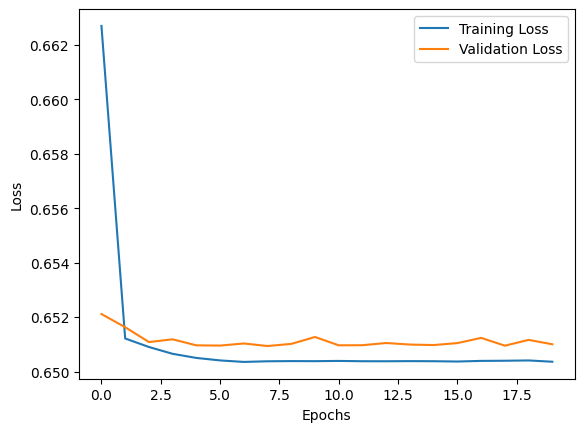

In [ ]:
#Base NN modelbut add a layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_dim=x_train.shape[1]),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid') 
    ])

model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ks-projects-201801.csv'
kickstarter_data = pd.read_csv(file_path)

kickstarter_cleaned = kickstarter_data.drop(columns=['ID', 'name', 'pledged', 'usd pledged', 'category',
                                                     'currency', 'backers', 'country', 'usd_pledged_real', 'goal'])

kickstarter_cleaned['target'] = kickstarter_cleaned['state'].apply(lambda x: 1 if x == 'successful' else 0)
kickstarter_cleaned = kickstarter_cleaned.drop(columns=['state'])

kickstarter_cleaned['launched'] = pd.to_datetime(kickstarter_cleaned['launched'])
kickstarter_cleaned['deadline'] = pd.to_datetime(kickstarter_cleaned['deadline'])

kickstarter_cleaned['launch_month'] = kickstarter_cleaned['launched'].dt.month
kickstarter_cleaned['launch_quarter'] = kickstarter_cleaned['launched'].dt.quarter

kickstarter_cleaned['duration_days'] = (kickstarter_cleaned['deadline'] - kickstarter_cleaned['launched']).dt.days
kickstarter_cleaned = kickstarter_cleaned.drop(columns=['launched', 'deadline'])

kickstarter_cleaned.rename(columns={'usd_goal_real': 'goal', 'main_category': 'category'}, inplace=True)
kickstarter_cleaned['goal_to_duration_ratio'] = kickstarter_cleaned['goal'] / kickstarter_cleaned['duration_days']
kickstarter_cleaned['goal_to_duration_ratio'] = kickstarter_cleaned['goal_to_duration_ratio'].replace([np.inf, -np.inf], 0).fillna(0)

kickstarter_cleaned = pd.get_dummies(kickstarter_cleaned, columns=['category'], drop_first=True, dtype=int)

X = kickstarter_cleaned.drop(columns=['target'])
y = kickstarter_cleaned['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scale_pos_weight = len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1])
xgb_model_weighted = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model_weighted.fit(X_train_smote, y_train_smote)

y_pred_proba_xgb_weighted = xgb_model_weighted.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb_weighted)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")

y_pred_threshold = (y_pred_proba_xgb_weighted >= optimal_threshold).astype(int)

accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
print("\nMetrics with Optimized Threshold:")
print(f"Accuracy: {accuracy_threshold:.2f}")
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))

thresholds_to_try = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
for threshold in thresholds_to_try:
    y_pred_custom = (y_pred_proba_xgb_weighted >= threshold).astype(int)
    accuracy_custom = accuracy_score(y_test, y_pred_custom)
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {accuracy_custom:.2f}")
    print(confusion_matrix(y_test, y_pred_custom))
    print(classification_report(y_test, y_pred_custom))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb_weighted)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_xgb_weighted):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure()
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Train a Standard SVM
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_train_smote, y_train_smote)

y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

y_pred_svm_default = svm_model.predict(X_test)

print("SVM Metrics (Default Threshold):")
print(confusion_matrix(y_test, y_pred_svm_default))
print(classification_report(y_test, y_pred_svm_default))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_svm):.2f}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_svm)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold for SVM: {optimal_threshold:.2f}")

y_pred_svm_tuned = (y_pred_proba_svm >= optimal_threshold).astype(int)

print("\nSVM Metrics (Tuned Threshold):")
print(confusion_matrix(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42, class_weight='balanced'),
                               param_grid=param_grid_svm, cv=5, scoring='f1')
grid_search_svm.fit(X_train_smote, y_train_smote)

print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")

best_svm_model = grid_search_svm.best_estimator_
y_pred_proba_best_svm = best_svm_model.predict_proba(X_test)[:, 1]

y_pred_best_svm = (y_pred_proba_best_svm >= optimal_threshold).astype(int)

print("\nBest SVM Model Metrics:")
print(confusion_matrix(y_test, y_pred_best_svm))
print(classification_report(y_test, y_pred_best_svm))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_best_svm):.2f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_best_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_best_svm):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

plt.figure()
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SVM Precision-Recall Curve")
plt.legend()
plt.show()
